In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


importamos las librerias necesarias

In [117]:
import os

import numpy as np

from matplotlib import pyplot

from scipy import optimize

%matplotlib inline

import pandas as pd
import sklearn as skl

from sklearn.preprocessing import StandardScaler

Recibimos el dataset y aplicamos la lectura de datos

In [118]:
url = "/content/drive/MyDrive/Colab Notebooks/Datasets/panic_disorder_dataset_testing_Pandas.csv"
dataframe = pd.read_csv(url)
print(dataframe)

       Age  Gender  Family History  Personal History  Current Stressors  \
0       41       1               1                 0                  9   
1       20       2               1                 0                  1   
2       32       1               1                 1                  8   
3       41       2               1                 1                  5   
4       36       2               1                 0                  8   
...    ...     ...             ...               ...                ...   
19995   31       2               1                 1                  8   
19996   27       1               0                 1                  7   
19997   21       2               0                 0                  4   
19998   28       1               0                 1                  5   
19999   22       2               0                 1                  6   

       Symptoms  Severity  Impact on Life  Demographics  Medical History  \
0             1        

In [119]:
print(dataframe.describe())

                Age        Gender  Family History  Personal History  \
count  20000.000000  20000.000000    20000.000000      20000.000000   
mean      41.489250      1.502200        0.497850          0.501350   
std       13.887773      0.500008        0.500008          0.500011   
min       18.000000      1.000000        0.000000          0.000000   
25%       29.000000      1.000000        0.000000          0.000000   
50%       42.000000      2.000000        0.000000          1.000000   
75%       54.000000      2.000000        1.000000          1.000000   
max       65.000000      2.000000        1.000000          1.000000   

       Current Stressors      Symptoms     Severity  Impact on Life  \
count       20000.000000  20000.000000  20000.00000    20000.000000   
mean            5.148550      2.802150      1.99380        2.020150   
std             2.462273      1.162787      0.81492        0.816564   
min             1.000000      1.000000      1.00000        1.000000   
25%  

Separamos los datos X y los datos Y

In [120]:
dataset = dataframe.drop("Panic Disorder Diagnosis", axis=1)
label = dataframe["Panic Disorder Diagnosis"].copy()

In [121]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
l_values = dataframe[['Current Stressors']]
scaled_values = min_max_scaler.fit(l_values)
print(min_max_scaler.transform(l_values)[0:10])

[[0.88888889]
 [0.        ]
 [0.77777778]
 [0.44444444]
 [0.77777778]
 [0.44444444]
 [0.77777778]
 [0.88888889]
 [0.        ]
 [0.66666667]]


Agregar las funciones necesarias

In [122]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [123]:
def calculate_cost(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = (1/m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h)))
    return cost

In [124]:
def gradient(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    grad = (1/m) * np.dot(X.T, (h - y))
    return grad

In [125]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []
    for i in range(num_iters):
        theta -= alpha * gradient(theta, X, y)
        J_history.append(calculate_cost(theta, X, y))
    return theta, J_history

In [126]:
def feature_normalize(X):
    X_norm = X.copy()
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

Dividir los datos de entrenamiento y prueba, 80 y 20 %

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=42)

Normalizar los datos

In [128]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [129]:
X_train_norm = np.c_[np.ones((X_train_norm.shape[0], 1)), X_train_norm]
X_test_norm = np.c_[np.ones((X_test_norm.shape[0], 1)), X_test_norm]

Ajustar valores alpha e iteraciones

In [130]:
alpha = 0.01
num_iters = 10000

In [131]:
theta = np.zeros(X_train_norm.shape[1])

In [132]:
theta, J_history = gradient_descent(X_train_norm, y_train, theta, alpha, num_iters)


Calculamos el indice de prediccion del modelo

In [133]:
predictions = sigmoid(np.dot(X_test_norm, theta))
predictions[predictions >= 0.5] = 1
predictions[predictions < 0.5] = 0
accuracy = np.mean(predictions == y_test)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.95925


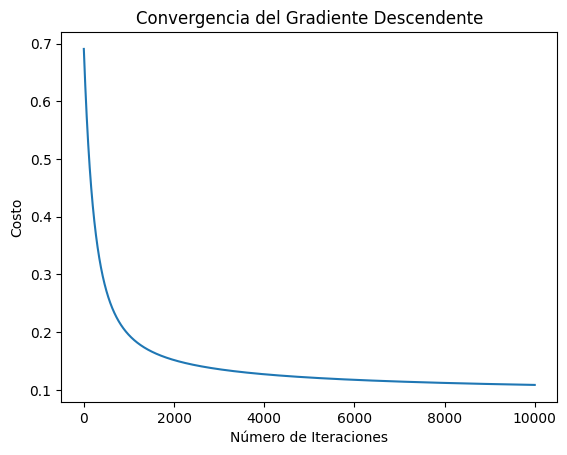

theta calculado por el descenso por el gradiente: [-3.94445895  0.01709265  0.03840314  0.29340543  0.30116521  0.61202628
 -0.14509634  0.41881617  0.4674998   0.1316917   0.22006828  0.10040812
  0.08707573  0.09912471 -0.08308614  1.27478444]


In [134]:
pyplot.plot(range(num_iters), J_history)
pyplot.xlabel('Número de Iteraciones')
pyplot.ylabel('Costo')
pyplot.title('Convergencia del Gradiente Descendente')
pyplot.show()
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [135]:
print(X_test)
print(theta)

       Age  Gender  Family History  Personal History  Current Stressors  \
10650   63       2               0                 0                  6   
2041    50       1               0                 0                  7   
8668    22       1               1                 1                  4   
1114    55       2               1                 1                  8   
13902   48       1               0                 1                  4   
...    ...     ...             ...               ...                ...   
4073    60       2               0                 0                  5   
7442    43       1               1                 0                  6   
9999    21       1               0                 0                  3   
1870    36       2               0                 1                  4   
15196   61       2               1                 1                  3   

       Symptoms  Severity  Impact on Life  Demographics  Medical History  \
10650         3        

Prueba o testeo de datos

In [136]:
X_test_norm, mu, sigma = feature_normalize(X_test)

In [137]:
m, n = X_test_norm.shape
X_test_norm = np.concatenate([np.ones((m, 1)), X_test_norm], axis=1)

In [138]:
diagnostico = sigmoid(np.dot(X_test_norm, theta))

In [139]:
datos_persona = [56, 2, 1, 1, 2, 1, 2, 1, 2, 3, 2, 2, 2, 3, 1]

In [140]:
datos_persona_norm = (datos_persona - mu) / sigma

In [141]:
datos_persona_norm = np.concatenate([[1], datos_persona_norm])

In [142]:
probabilidad_diagnostico = sigmoid(np.dot(datos_persona_norm, theta))
print('Una persona con los siguientes datos {} tiene una probabilidad de ser diagnosticada con trastorno de pánico: {:.2f}'.format(datos_persona, probabilidad_diagnostico))

Una persona con los siguientes datos [56, 2, 1, 1, 2, 1, 2, 1, 2, 3, 2, 2, 2, 3, 1] tiene una probabilidad de ser diagnosticada con trastorno de pánico: 0.00


In [143]:
from sklearn.svm import SVC

classifier =  SVC()

classifier.fit(X_train, y_train)

print(classifier.score(X_test, y_test))

0.95725
